In [1]:
import pandas as pd

wine_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/wine.csv'

wine = pd.read_csv(wine_url, index_col=0)

# 맛 등급 컬럼 추가

wine['taste'] = [1 if grade > 5 else 0 for grade in wine['quality']]

X = wine.drop(['taste', 'quality'], axis = 1)
y = wine['taste']

In [2]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_sc, y , test_size= 0.2, random_state=13)

array([[<AxesSubplot:title={'center':'fixed acidity'}>,
        <AxesSubplot:title={'center':'volatile acidity'}>,
        <AxesSubplot:title={'center':'citric acid'}>,
        <AxesSubplot:title={'center':'residual sugar'}>],
       [<AxesSubplot:title={'center':'chlorides'}>,
        <AxesSubplot:title={'center':'free sulfur dioxide'}>,
        <AxesSubplot:title={'center':'total sulfur dioxide'}>,
        <AxesSubplot:title={'center':'density'}>],
       [<AxesSubplot:title={'center':'pH'}>,
        <AxesSubplot:title={'center':'sulphates'}>,
        <AxesSubplot:title={'center':'alcohol'}>,
        <AxesSubplot:title={'center':'quality'}>],
       [<AxesSubplot:title={'center':'color'}>,
        <AxesSubplot:title={'center':'taste'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

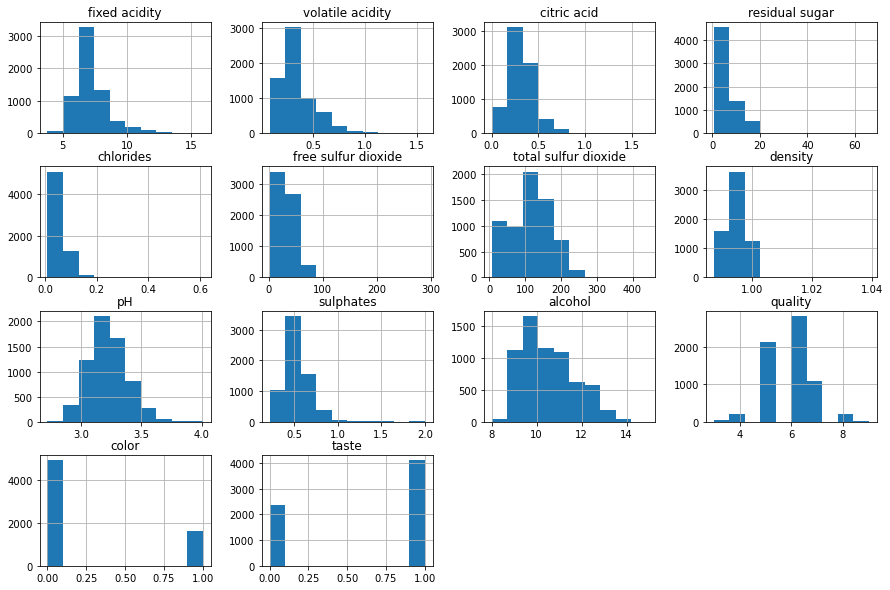

In [4]:
import matplotlib.pyplot as plt

wine.hist(bins = 10, figsize=(15,10))

In [5]:

# quality별 특성을 확인해보자.

column_names = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

df_pivot_table = wine.pivot_table(column_names, ['quality'], aggfunc = 'median')
df_pivot_table

,alcohol,chlorides,citric acid,density,fixed acidity,free sulfur dioxide,pH,residual sugar,sulphates,total sulfur dioxide,volatile acidity
quality,,,,,,,,,,,
3,10.15,0.0550,0.33,0.995900,7.45,17.0,3.245,3.15,0.505,102.5,0.415
4,10.00,0.0505,0.26,0.994995,7.00,15.0,3.220,2.20,0.485,102.0,0.380
5,9.60,0.0530,0.30,0.996100,7.10,27.0,3.190,3.00,0.500,127.0,0.330
6,10.50,0.0460,0.31,0.994700,6.90,29.0,3.210,3.10,0.510,117.0,0.270
7,11.40,0.0390,0.32,0.992400,6.90,30.0,3.220,2.80,0.520,114.0,0.270
8,12.00,0.0370,0.32,0.991890,6.80,34.0,3.230,4.10,0.480,118.0,0.280
9,12.50,0.0310,0.36,0.990300,7.10,28.0,3.280,2.20,0.460,119.0,0.270


In [8]:
corr_matrix = wine.corr()
corr_matrix

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,taste
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282735,-0.329054,0.458910,-0.252700,0.299568,-0.095452,-0.076743,0.486740,-0.067354
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352557,-0.414476,0.271296,0.261454,0.225984,-0.037640,-0.265699,0.653036,-0.267046
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133126,0.195242,0.096154,-0.329808,0.056197,-0.010493,0.085532,-0.187397,0.075739
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402871,0.495482,0.552517,-0.267320,-0.185927,-0.359415,-0.036980,-0.348821,-0.032484
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195045,-0.279630,0.362615,0.044708,0.395593,-0.256916,-0.200666,0.512678,-0.181908
free sulfur dioxide,-0.282735,-0.352557,0.133126,0.402871,-0.195045,1.000000,0.720934,0.025717,-0.145854,-0.188457,-0.179838,0.055463,-0.471644,0.044819
total sulfur dioxide,-0.329054,-0.414476,0.195242,0.495482,-0.279630,0.720934,1.000000,0.032395,-0.238413,-0.275727,-0.265740,-0.041385,-0.700357,-0.047585
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025717,0.032395,1.000000,0.011686,0.259478,-0.686745,-0.305858,0.390645,-0.268876
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145854,-0.238413,0.011686,1.000000,0.192123,0.121248,0.019506,0.329129,0.018842
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188457,-0.275727,0.259478,0.192123,1.000000,-0.003029,0.038485,0.487218,0.035807


In [9]:
# quality변수와의 상관계수
corr_matrix['quality'].sort_values(ascending=False)

quality                 1.000000
taste                   0.814484
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
color                  -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [10]:
wine['taste']

0       0
1       0
2       0
3       1
4       0
       ..
4893    1
4894    0
4895    1
4896    1
4897    1
Name: taste, Length: 6497, dtype: int64

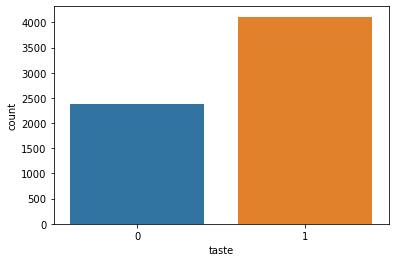

In [11]:
import seaborn as sns

sns.countplot(x = wine['taste'])
plt.show()

## 모델링

여러 모델들에 대해 한 번에 학습시키고 평가하고 싶다면 아래 방법을 사용하면 된다.

In [12]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

models = []
models.append( ('AdaBoostClassifier', AdaBoostClassifier()))
models.append( ('GradientBoostingClassifier', GradientBoostingClassifier()))
models.append( ('RandomForestClassifier', RandomForestClassifier()))
models.append( ('DecisionTreeClassifier', DecisionTreeClassifier()))
models.append( ('LogisticRegression', LogisticRegression()))

In [13]:
# 교차검증을 실시하며 각 모델의 성능을 저장함

from sklearn.model_selection import KFold, cross_val_score

results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=5, random_state=13, shuffle= True) # shuffle : 데이터 분할 전 데이터를 섞어라.
    cv_results = cross_val_score(model, X_train, y_train, cv = kfold, scoring='accuracy')

    results.append(cv_results)
    names.append(name)

    print(name, cv_results.mean(), cv_results.std())

AdaBoostClassifier 0.7533103205745169 0.02644765901536818
GradientBoostingClassifier 0.7663959428444511 0.021596556352125432
RandomForestClassifier 0.8187354704967795 0.01483379913379288
DecisionTreeClassifier 0.7583151328940549 0.01701958562754641
LogisticRegression 0.74273191678389 0.015548839626296565


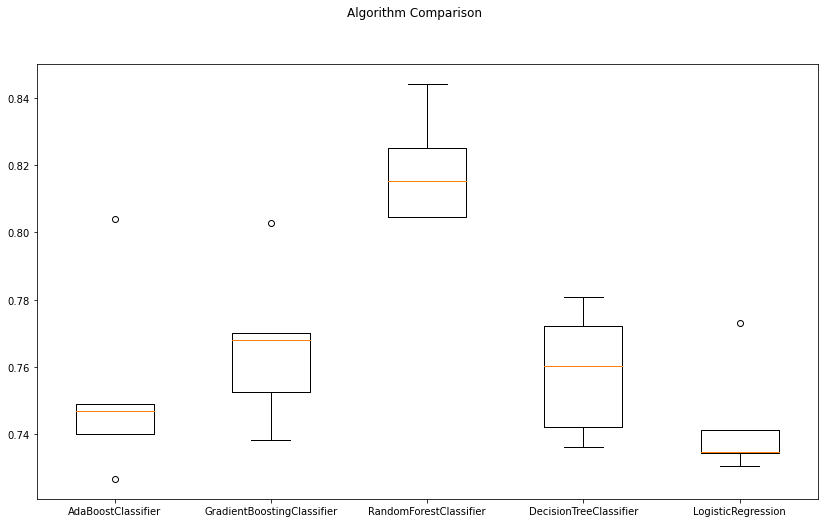

In [14]:
# 교차검증 결과 한 눈에 보기

fig = plt.figure(figsize=(14, 8))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


와인 데이터에서는 RandomForest가 성능이 제일 좋아보인다.

각 데이터의 특성에 따라 모델들의 성능은 달라진다.

In [15]:
# 테스트 데이터에 대한 성능 평가

from sklearn.metrics import accuracy_score

for name, model in models:
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    print(name, accuracy_score(y_test, pred))

AdaBoostClassifier 0.7553846153846154
GradientBoostingClassifier 0.7884615384615384
RandomForestClassifier 0.8392307692307692
DecisionTreeClassifier 0.7761538461538462
LogisticRegression 0.7469230769230769


## KNN

In [21]:
from sklearn.datasets import load_iris

iris = load_iris()

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2,
                                                    stratify=iris.target)

KNN은 그냥 주어진 데이터로부터 가장 가까운 클래스가 무엇인지 찾는 과정이기 때문에 이전 모델과 같이 실제로 학습(fit)을 하지는 않는다. 하지만 sklearn 상 fit을 시켜주어야하기 때문에 코드는 실행시켜주어야한다.

In [22]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [23]:
from sklearn.metrics import accuracy_score

pred = knn.predict(X_test)
accuracy_score(y_test, pred)

0.9666666666666667

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(y_test, pred)

array([[10,  0,  0],
       [ 0,  9,  1],
       [ 0,  0, 10]])

In [25]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## GBM

- 부스팅 알고리즘은 여러개의 약한 학습기를 순차적으로 학습 - 에측하면서 잘못 예측한 데이터에 가중치를 보유해서 오류를 개선하는 방식

- gbm은 가중치를 업데이트할떄 경사 하강법 (gradient descent)을 이용한것이  큰 차이 

In [27]:
import pandas as pd

url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/features.txt'

# \s+ : 공백 문자(스페이스, 탭, 개행 등)
feature_name_df = pd.read_csv(url, sep = '\s+', header = None,
                              names = ['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:,1].values.tolist() # 리스트 형태로 바꿔줌

X_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/X_train.txt'
X_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/X_test.txt'

X_train = pd.read_csv(X_train_url, sep = '\s+', header = None)
X_test = pd.read_csv(X_test_url, sep = '\s+', header = None)

X_train.columns = feature_name
X_test.columns = feature_name

In [28]:
y_train_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/train/y_train.txt'
y_test_url = 'https://raw.githubusercontent.com/PinkWink/ML_tutorial/master/dataset/HAR_dataset/test/y_test.txt'

y_train = pd.read_csv(y_train_url, sep = '\s+', header = None, names = ['action'])
y_test = pd.read_csv(y_test_url, sep = '\s+', header = None, names = ['action'])

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

gb_clf = GradientBoostingClassifier(random_state=13)
gb_clf.fit(X_train, y_train)
gb_pred = gb_clf.predict(X_test)

accuracy_score(y_test, gb_pred)


일반적으로 GBM의 성능 자체는 랜덤포레스트보단 좋다고 알려져있다. 하지만 속도가 매우 느린 것이 단점이다.

In [ ]:
# GridSearch
from sklearn.model_selection import GridSearchCV

params = {
    'n_estimators' : [100,500],
    'learning_rate' : [0.05, 0.1]
}

## verbose 옵션 : 수행 결과 메세지 출력 여부
## 0(default) : 출력 x, 1 : 간단한 메세지 출력, 2 : 하이퍼파라미터별 메세지 출력
grid = GridSearchCV(gb_clf, param_grid=params, cv = 2, verbose=2, n_jobs=-1)
grid.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test, grid.best_estimator_.predict(X_test))

##  XGBoost

In [41]:
pip install xgboost

  Using cached xgboost-2.0.2-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [31]:
# https://velog.io/@theo/xgboost-%EC%83%88-%EB%B2%84%EC%A0%84%EC%97%90%EC%84%9C-%EC%83%9D%EA%B8%B4-%EC%98%A4%EB%A5%98
# ValueError: Invalid classes inferred from unique values of `y`. 에러 해결

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)

/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [32]:
y_train

array([4, 4, 4, ..., 1, 1, 1])

In [42]:
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb.fit(X_train.values, y_train) # xgboost에는 numpy values값의 형태로 넣어주어야한다.

accuracy_score(y_test, xgb.predict(X_test))

0.9497794367153037

In [43]:
# 조기 종료 조건과 검증 데이터 지정

evals = [(X_test.values, y_test)] # 검증 데이터 셋. 이번 실습에서는 테스트 셋을 검증 셋으로 설정했다.

xgb = XGBClassifier(n_estimators = 400, learning_rate = 0.1, max_depth=3)
xgb.fit(X_train.values, y_train, early_stopping_rounds=10, eval_set=evals)
# eval_set: 평가를 수행하는 별도의 검증 데이터 세트.
# early_stopping_rounds: 조기 중단할 수 있는 최소 반복 횟수

/Users/aragbagofideas/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:885: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-mlogloss:1.58912
[1]	validation_0-mlogloss:1.43298
[2]	validation_0-mlogloss:1.30579
[3]	validation_0-mlogloss:1.19398
[4]	validation_0-mlogloss:1.10151
[5]	validation_0-mlogloss:1.01952
[6]	validation_0-mlogloss:0.94821
[7]	validation_0-mlogloss:0.88468
[8]	validation_0-mlogloss:0.82846
[9]	validation_0-mlogloss:0.77660
[10]	validation_0-mlogloss:0.73051
[11]	validation_0-mlogloss:0.68873
[12]	validation_0-mlogloss:0.65163
[13]	validation_0-mlogloss:0.61809
[14]	validation_0-mlogloss:0.58776
[15]	validation_0-mlogloss:0.55936
[16]	validation_0-mlogloss:0.53447
[17]	validation_0-mlogloss:0.51131
[18]	validation_0-mlogloss:0.49076
[19]	validation_0-mlogloss:0.47043
[20]	validation_0-mlogloss:0.45119
[21]	validation_0-mlogloss:0.43441
[22]	validation_0-mlogloss:0.41777
[23]	validation_0-mlogloss:0.40352
[24]	validation_0-mlogloss:0.38949
[25]	validation_0-mlogloss:0.37684
[26]	validation_0-mlogloss:0.36371
[27]	validation_0-mlogloss:0.35286
[28]	validation_0-mlogloss:0.3

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=400, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [44]:
accuracy_score(y_test, xgb.predict(X_test))

0.9453681710213777